<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python 2021** <br>
**PROFESORES:** Germán González<br><br>


# Clase 6: Agrupación
- K-modas






In [4]:
#!pip3 install pandas
#!pip3 install kmodes
#!pip3 install plotnine
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)


In [5]:
###### ------- Cargar los datos ---------- #######
df = pd.read_csv('Sales Records.csv')

In [16]:
### ---- Como se ven los datos ------ ####
df.groupby(['Region','Country']).apply(lambda x: sum(x['Units Sold'])).to_excel('ventas.xlsx')

In [10]:
#### Evaluar si existen missing values
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
df_region = pd.DataFrame(df['Region'].value_counts()).reset_index()
df_region['Percentage'] = (df_region['Region'] / df['Region'].value_counts().sum())*100
df_region.rename(columns = {'index':'Region', 'Region':'Total'}, inplace = True)
df_region = df_region.sort_values('Total', ascending = True).reset_index(drop = True)

In [10]:
### ----- Distribución por región ------ #####
df_region

,Region,Total,Percentage
0,North America,215,2.15
1,Australia and Oceania,797,7.97
2,Central America and the Caribbean,1019,10.19
3,Middle East and North Africa,1264,12.64
4,Asia,1469,14.69
5,Sub-Saharan Africa,2603,26.03
6,Europe,2633,26.33


In [17]:
###### ------- Estadisticas descriptivas por region ------ #####
df_region = df.groupby('Region').agg({
    'Region': 'count',
    'Units Sold': 'mean',
    'Total Revenue': 'mean',
    'Total Cost': 'mean',
    'Total Profit': 'mean'
    }
).rename(columns = {'Region': 'Total'}).reset_index().sort_values('Total', ascending = True)

df_region


,Region,Total,Units Sold,Total Revenue,Total Cost,Total Profit
5,North America,215,5373.358140,1.559779e+06,1.097009e+06,462769.837767
1,Australia and Oceania,797,4986.769134,1.317192e+06,9.105785e+05,406613.816073
2,Central America and the Caribbean,1019,5081.062807,1.369509e+06,9.736721e+05,395836.947713
4,Middle East and North Africa,1264,5116.219146,1.357305e+06,9.538842e+05,403420.802634
0,Asia,1469,5015.488087,1.365082e+06,9.652160e+05,399866.097243
6,Sub-Saharan Africa,2603,4967.807530,1.287190e+06,9.031555e+05,384034.610642
3,Europe,2633,4920.384732,1.322207e+06,9.321582e+05,390049.226282


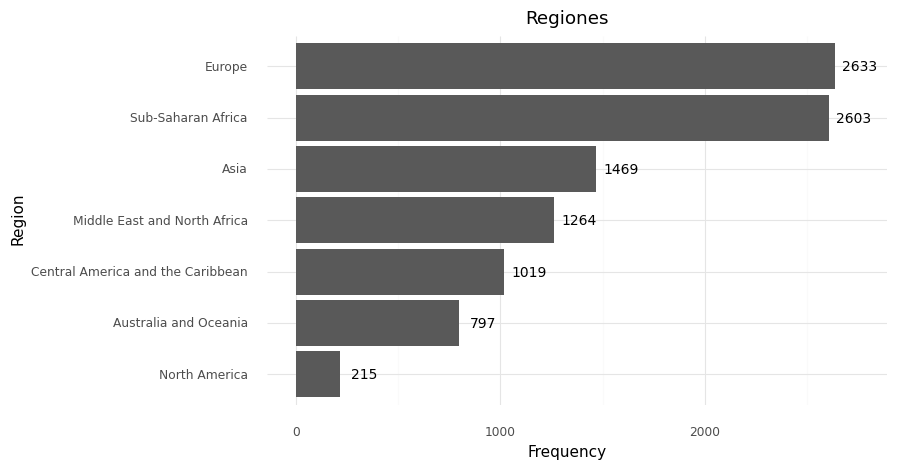

<ggplot: (353478365)>

In [18]:
### ----- Distribucion por regiones ------- #####
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_region)+
    geom_bar(aes(x = 'Region',
                 y = 'Total'),
             stat = 'identity')+
    geom_text(aes(x = 'Region',
                   y = 'Total',
                   label = 'Total'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Regiones')+
    xlab('Region')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_region['Region'].tolist())+
    theme_minimal()+
    coord_flip()
)

In [24]:
import datetime

2011

In [31]:
df['year'] = df['Ship Date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%M/%Y").year)

In [32]:
df.groupby(['Region','year']).apply(lambda x: x['Units Sold'].sum()).reset_index(drop=False).pivot('Region','year',0)

year,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,
Asia,919206,1089445,977080,968378,997757,956848,880630,578408
Australia and Oceania,461231,469332,465336,582530,577188,531148,565935,321755
Central America and the Caribbean,579941,686739,699716,685634,651096,808238,668986,397253
Europe,1404345,1706227,1703795,1857765,1584257,1680513,1869884,1148587
Middle East and North Africa,713394,854230,837542,884977,861434,964988,833564,516772
North America,115602,146934,174720,103322,200574,160755,108066,145299
Sub-Saharan Africa,1487738,1750057,1702623,1647228,1891850,1737863,1652231,1061613


In [34]:
df.groupby(['Region','Item Type']).apply(lambda x: x['Units Sold'].sum()).reset_index(drop=False).pivot('Region','Item Type',0)

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,665471,552183,606090,529194,595887,519528,590576,569064,713256,679579,624424,722500
Australia and Oceania,338649,231776,376422,392626,388820,309742,370021,301356,231016,339121,331450,363456
Central America and the Caribbean,342415,459738,432615,426351,326483,413885,535439,408766,449788,432599,469966,479558
Europe,1010572,940530,1141125,1134176,1144512,1052557,1027566,1124176,1127396,1173278,1018397,1061088
Middle East and North Africa,532188,513099,511409,606811,508802,525082,618690,486978,502577,619864,481348,560053
North America,129199,94134,71719,109376,123031,65433,129657,94875,90578,94433,83149,69688
Sub-Saharan Africa,1178512,1118976,1064014,1153816,1015755,1169694,1064854,1000175,1005652,1063953,1114047,981755


In [35]:
df.groupby(['Region','Item Type']).apply(lambda x: x['Total Revenue'].sum()).reset_index(drop=False).pivot('Region','Item Type',0)

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,1.698814e+08,26201083.35,124672713.0,5.783032e+07,260521796.4,4847196.24,3.946642e+08,2.400824e+08,4.644794e+08,55541991.67,9.527461e+07,1.113084e+08
Australia and Oceania,8.645032e+07,10997771.20,77430005.4,4.290617e+07,169992104.0,2889892.86,2.472739e+08,1.271391e+08,1.504399e+08,27716359.33,5.057264e+07,5.599403e+07
Central America and the Caribbean,8.741170e+07,21814568.10,88988905.5,4.659164e+07,142738367.6,3861547.05,3.578178e+08,1.724543e+08,2.929064e+08,35356316.27,7.170741e+07,7.388071e+07
Europe,2.579788e+08,44628148.50,234729412.5,1.239428e+08,500380646.4,9820356.81,6.866915e+08,4.742786e+08,7.341715e+08,95892010.94,1.553870e+08,1.634712e+08
Middle East and North Africa,1.358570e+08,24346547.55,105196831.3,6.631231e+07,222448234.4,4899015.06,4.134520e+08,2.054511e+08,3.272832e+08,50661484.72,7.344408e+07,8.628177e+07
North America,3.298192e+07,4466658.30,14752598.3,1.195261e+07,53789153.2,610489.89,8.664588e+07,4.002681e+07,5.898530e+07,7718009.09,1.268687e+07,1.073613e+07
Sub-Saharan Africa,3.008505e+08,53095411.20,218867679.8,1.260890e+08,444088086.0,10913245.02,7.116100e+08,4.219638e+08,6.548906e+08,86956878.69,1.699813e+08,1.512492e+08


In [36]:
#### ----- Procesamiento de los datos para los clusters -------- ######
df.drop(['Country', 'Order Date', 'Order ID', 'Ship Date'], axis = 1, inplace = True)
df.head()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00,2011
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50,2016
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95,2011
3,Sub-Saharan Africa,Household,Online,C,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,2012
4,Europe,Beverages,Online,C,3491,47.45,31.79,165647.95,110978.89,54669.06,2015


In [37]:
df.dtypes

Region             object
Item Type          object
Sales Channel      object
Order Priority     object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
year                int64
dtype: object

In [38]:
#### ----- identiifcar variables categoricas ----- ####
catColumnsPos = [list(df).index(x) for x in list(df.select_dtypes('object').columns)]
#### ----- identiifcar variables categoricas ----- ####
numColumnsPos = [list(df).index(x) for x in list(df.select_dtypes('int64').columns)] +[list(df).index(x) for x in list(df.select_dtypes('float64').columns)] 

In [40]:
numColumnsPos

[4, 10, 5, 6, 7, 8, 9]

In [42]:
dfMatrix = df.to_numpy()
# Choosing optimal K


costo = []
for cluster in range(1, 10):
    ### ------ Evaluar ----- ###
    try:
        #### ------- Definicion del modelo ------ #### 
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, random_state = 0)
        ### ------ Predecir ----- ###
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        ### ------ Evaluar el costo ------- ###
        costo.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
        
    ### ----- Si falla continuar
    except:
        break
        


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6


In [41]:
costo

NameError: name 'costo' is not defined

In [19]:
### ---- Organizar resultados ----- #####
df_cost = pd.DataFrame({'Grupo':range(1, 6), 'Costo':costo})
df_cost.head()

,Grupo,Costo
0,1,3.601618e+16
1,2,9.627992e+15
2,3,4.960714e+15
3,4,2.927463e+15
4,5,1.975349e+15


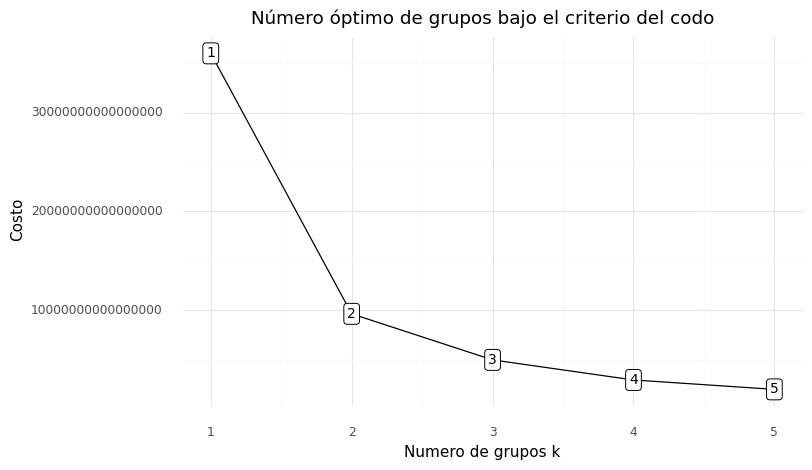

<ggplot: (348874057)>

In [20]:
##### -------- Graficar Elbow method  ---------- #####
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Grupo',
                  y = 'costo'))+
    geom_point(aes(x = 'Grupo',
                   y = 'costo'))+
    geom_label(aes(x = 'Grupo',
                   y = 'costo',
                   label = 'Grupo'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Número óptimo de grupos bajo el criterio del codo')+
    xlab('Numero de grupos k')+
    ylab('Costo')+
    theme_minimal()
)

## Mostrar los resultados finales

In [21]:
##### ------- Correr el modelo con el número óptimo de clusters ------- ########
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 0, 0, ..., 0, 2, 0], dtype=uint16)

In [22]:
###### -------- Organizar centroides -------- ##### 
df['Etiquetas'] = kprototype.labels_
# Show the first 5 rows
df.head()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Etiquetas
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00,1
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50,0
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95,0
3,Sub-Saharan Africa,Household,Online,C,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,2
4,Europe,Beverages,Online,C,3491,47.45,31.79,165647.95,110978.89,54669.06,0


In [23]:
#### --------- Centroides -------- #######

Centroides = pd.DataFrame(kprototype.cluster_centroids_)
Centroides.columns = list(df.iloc[:,numColumnsPos])  + list(df.iloc[:,catColumnsPos])

In [24]:
Centroides

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region,Item Type,Sales Channel,Order Priority
0,4046.6694875411376,163.25910672308183,105.79686882933798,467709.4517003615,281142.95464974205,186566.4970506184,Sub-Saharan Africa,Personal Care,Online,C
1,6093.2754219843555,384.26450391107267,275.09750102922743,1995888.1232729503,1380539.527303416,615348.5959695342,Europe,Cosmetics,Online,H
2,7904.365546218487,593.5265126050477,457.78549579832287,4622760.547554607,3559121.123487402,1063639.424067228,Europe,Household,Offline,L


In [25]:
### ------- Interpretacion de los centroides ------- #######
df['Conteo']=0
# Cluster interpretation
df.groupby('Etiquetas').agg(
    {
        'Conteo':'count',
        'Region': lambda x: x.value_counts().index[0],
        'Item Type': lambda x: x.value_counts().index[0],
        'Sales Channel': lambda x: x.value_counts().index[0],
        'Order Priority': lambda x: x.value_counts().index[0],
        'Units Sold': 'mean',
        'Unit Price': 'mean',
        'Total Revenue': 'mean',
        'Total Cost': 'mean',
        'Total Profit': 'mean'
    }
).reset_index()


,Etiquetas,Conteo,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Revenue,Total Cost,Total Profit
0,0,6381,Sub-Saharan Africa,Personal Care,Online,C,4046.669488,163.259107,4.677095e+05,2.811430e+05,1.865665e+05
1,1,2429,Europe,Cosmetics,Online,H,6093.275422,384.264504,1.995888e+06,1.380540e+06,6.153486e+05
2,2,1190,Europe,Household,Offline,L,7904.365546,593.526513,4.622761e+06,3.559121e+06,1.063639e+06
